<a href="https://colab.research.google.com/github/Ekissi/Ekissi/blob/main/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 SUPPORT VECTOR REGESSION MODEL**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

pca = PCA(n_components=8)  # Choose number of components
X_train_pca = pca.fit_transform(x_train)

# Tuning of parameters for regression by cross-validation
K = 10               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [0.05,0.055, 0.062, 0.072, 0.083, 0.1, 0.12,0.17,0.25,0.5],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-99.999 (+/-339.383) for {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}
-104.731 (+/-355.149) for {'C': 1, 'gamma': 0.055, 'kernel': 'rbf'}
-112.563 (+/-378.097) for {'C': 1, 'gamma': 0.062, 'kernel': 'rbf'}
-120.477 (+/-399.706) for {'C': 1, 'gamma': 0.072, 'kernel': 'rbf'}
-126.693 (+/-420.295) for {'C': 1, 'gamma': 0.083, 'kernel': 'rbf'}
-135.392 (+/-450.125) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-144.259 (+/-471.311) for {'C': 1, 'gamma': 0.12, 'kernel': 'rbf'}
-170.008 (+/-546.855) for {'C': 1, 'gamma': 0.17, 'kernel': 'rbf'}
-197.527 (+/-602.814) for {'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}
-256.316 (+/-711.829) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-32.835 (+/-74.907) for {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
-33.251 (+/-76.535) for {'C': 10, 'gamma': 0.055, 'kernel': 'rbf'}
-33.596 (+/-78.045) for {'C': 10, 'gamma': 0.062, 'kernel': 'rbf'}
-34.172 (+/-80.314) for {'C': 10, 'gamma': 0.072, 'kernel': 'rbf'}
-34.922 (

In [ ]:
# @title Cross validation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

pca = PCA(n_components=8)  # Choose number of components
x_train_pca = pca.fit_transform(x_train)
n = 0.072
reg1 = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
model=reg1.fit(x_train_pca,y_train)

y_pred = cross_val_predict(reg1, x_train, y_train, cv=10)

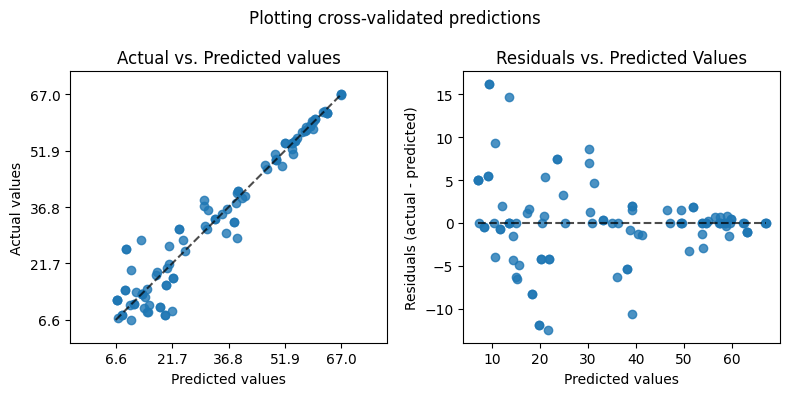

In [ ]:
# @title Plotting cross-validated predictions
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4),)
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [79]:
# @title Model SVR
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
features = np.array(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
    scalertr = StandardScaler().fit(x_train)
    x_train = scalertr.transform(x_train)
    x_test = scalertr.transform(x_test)
    pca = PCA(n_components=8)  # Choose number of components
    x_train_pca = pca.fit_transform(x_train)
    n = 0.072
    reg1 = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
    model_svr=reg1.fit(x_train_pca,y_train)

    #TRAINING MODEL
    y_pred = model_svr.predict(x_train_pca)
    Rsquared_tr=r2_score(y_train,y_pred )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred))
    mae_training = mean_absolute_error(y_train,y_pred)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)


    # MODEL TESTING
    x_test_pca = pca.transform(x_test)
    y_pred_test = model_svr.predict(x_test_pca)
    Rsquared_tt=r2_score(y_test,y_pred_test)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test))
    mae_test = mean_absolute_error(y_test,y_pred_test)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)

print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

TRAINING Rsquared: Average: 0.9473212892129252      SD : 0.0037814430599067044
TRAINING MSE:      Average: 4.547316391744734      SD : 0.15961711233739445
TRAINING MAE:      Average: 2.7073868539743886       SD : 0.1028331872196113
TEST Rsquared:     Average: 0.9020289094234009      SD : 0.023334761444594853
TEST MSE:          Average: 6.013643042683489        SD : 0.6597009015456742
TEST MAE:          Average: 4.368724776728515       SD : 0.4584039049853518


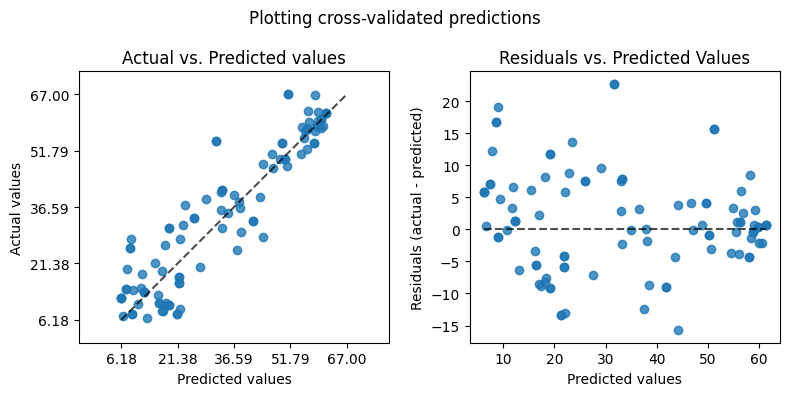

In [ ]:
# @title Plotting cross-validated predictions
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

y_pred = cross_val_predict(reg1, x_train_pca, y_train, cv=10)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4),)
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

0.3827224972945027
3.469603069778859
3.252849905179715


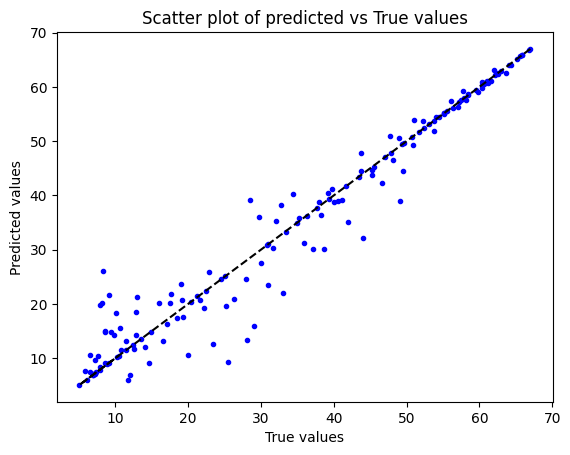

In [48]:
# @title SVR Training plot

import matplotlib.pyplot as plt
random_states =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
scalertr = StandardScaler().fit(x_train)
x_train = scalertr.transform(x_train)
x_test = scalertr.transform(x_test)
pca = PCA(n_components=8)  # Choose number of components
x_train_pca = pca.fit_transform(x_train)
n = 0.072
reg1 = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
model_svr=reg1.fit(x_train_pca,y_train)

#TRAINING MODEL
y_pred = model_svr.predict(x_train_pca)
dif_mc = abs(y_pred - y_train)
y_train = np.array(y_train)
m = dif_mc[np.where(y_train > 50)]
n = dif_mc[np.where((y_train > 15) & (y_train < 50))]
t = dif_mc[np.where(y_train < 15)]
mae1 = m.mean()
mae2 = n.mean()
mae3 = t.mean()
print(mae1)
print(mae2)
print(mae3)

# MODEL TESTING
x_test_pca = pca.transform(x_test)
y_pred_test = model_svr.predict(x_test_pca)

plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()



Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

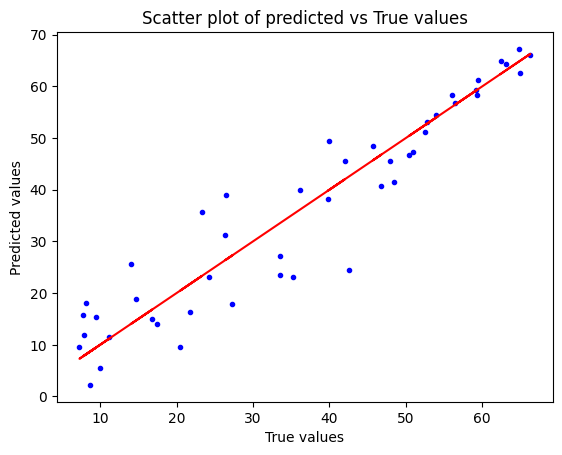

In [ ]:
# @title SVR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [ ]:
# @title SVR + Ridge Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

n = 0.7
svr_model = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
base_models = [('svr',svr_model), ('ridge',Ridge(alpha=0.001))]
meta_model = Ridge(alpha=0.001)
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
model=stacked_model.fit(x_train,y_train)

#TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#x_test_pca = pca.transform(x_test)
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)

TRAINING Rsquared: 0.9393750190405923
TRAINING MSE: 23.687413646275527
TRAINING MAE: 3.69838906996399
TEST Rsquared: 0.916560994166644
TEST MSE: 31.814865323004238
TEST MAE: 4.536285571749767


# **2 RIDGE** **REGRESSION**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train


# Tuning of parameters for regression by cross-validation
K = 20               # Number of cross valiations

# Parameters for tuning
parameters = [{'alpha': [1e-07,0.00001,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(Ridge(), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-186.555 (+/-737.332) for {'alpha': 1e-07}
-186.614 (+/-737.837) for {'alpha': 1e-05}
-187.149 (+/-742.332) for {'alpha': 0.0001}
-192.351 (+/-779.741) for {'alpha': 0.001}
-216.888 (+/-916.224) for {'alpha': 0.01}
-240.583 (+/-1034.598) for {'alpha': 0.05}
-248.283 (+/-1072.973) for {'alpha': 0.1}
-253.118 (+/-1098.403) for {'alpha': 0.2}
-254.916 (+/-1108.317) for {'alpha': 0.3}
-255.946 (+/-1113.785) for {'alpha': 0.4}
-256.696 (+/-1117.380) for {'alpha': 0.5}
-257.322 (+/-1120.010) for {'alpha': 0.6}
-257.880 (+/-1122.076) for {'alpha': 0.7}
-258.398 (+/-1123.779) for {'alpha': 0.8}
-258.885 (+/-1125.235) for {'alpha': 0.9}
-259.350 (+/-1126.515) for {'alpha': 1}
Best parameters: {'alpha': 1e-07}


In [81]:
# @title Ridge Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
features = np.array(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
    scalertr = StandardScaler().fit(x_train)
    x_train = scalertr.transform(x_train)
    x_test = scalertr.transform(x_test)
    ridge = Ridge(alpha=0.00001)
    model_ridge= ridge.fit(x_train, y_train)

    #TRAINING MODEL
    y_pred = model_ridge.predict(x_train)
    Rsquared_tr=r2_score(y_train,y_pred )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred))
    mae_training = mean_absolute_error(y_train,y_pred)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)

    # MODEL TESTING
    y_pred_test = model_ridge.predict(x_test)
    Rsquared_tt=r2_score(y_test,y_pred_test)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test))
    mae_test = mean_absolute_error(y_test,y_pred_test)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)

print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

TRAINING Rsquared: Average: 0.8931894611763787      SD : 0.01334415053050839
TRAINING MSE:      Average: 6.465005285667141      SD : 0.43362418250418094
TRAINING MAE:      Average: 4.8729349103320025       SD : 0.3234561956695151
TEST Rsquared:     Average: 0.8613678291541333      SD : 0.0756556526632581
TEST MSE:          Average: 7.0219452577050605        SD : 1.6247594389771374
TEST MAE:          Average: 5.2033730629553245       SD : 0.5502388770230089


4.9959006474012915
4.793688689390582
5.751861864426374
5.84118768386374
6.44772597316604
5.150997596516333


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

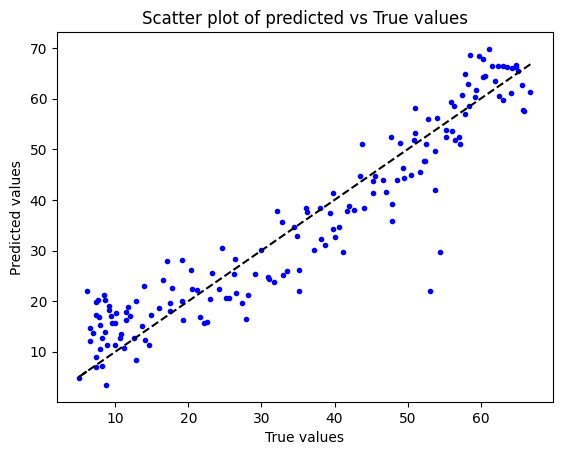

In [85]:
# @title Ridge Training plot
import matplotlib.pyplot as plt
#[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
random_state =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))

ridge = Ridge(alpha=0.00001)
model_ridge= ridge.fit(x_train, y_train)

#TRAINING MODEL
y_pred = model_ridge.predict(x_train)
dif_mc = abs(y_pred - y_train)
y_train = np.array(y_train)
m = dif_mc[np.where(y_train > 50)]
n = dif_mc[np.where((y_train > 15) & (y_train < 50))]
t = dif_mc[np.where(y_train < 15)]
mae1 = m.mean()
mae2 = n.mean()
mae3 = t.mean()
print(mae1)
print(mae2)
print(mae3)
# MODEL TESTING
y_pred_test = model_ridge.predict(x_test)
dif_mc_tt = abs(y_pred_test - y_test)
y_test = np.array(y_test)
m = dif_mc_tt[np.where(y_test > 50)]
n = dif_mc_tt[np.where((y_test > 15) & (y_test < 50))]
t = dif_mc_tt[np.where(y_test < 15)]
mae1_tt = m.mean()
mae2_tt = n.mean()
mae3_tt = t.mean()
print(mae1_tt)
print(mae2_tt)
print(mae3_tt)

plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

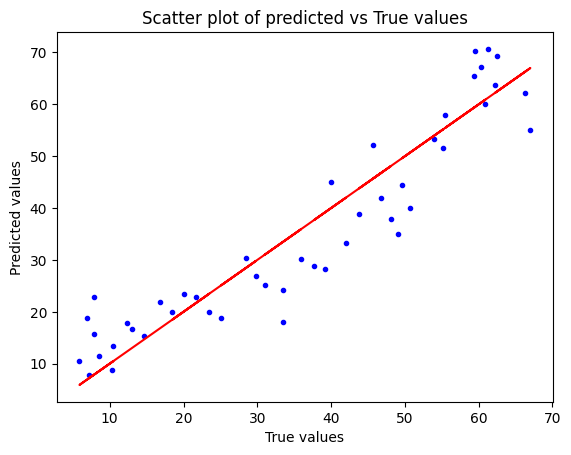

In [86]:
# @title Ridge Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **3 POLYNOMIAL**

In [88]:
# @title POLYNOMIAL Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
features = np.array(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
    scalertr = StandardScaler().fit(x_train)
    x_train = scalertr.transform(x_train)
    x_test = scalertr.transform(x_test)
    degree = 2
    poly_features = PolynomialFeatures(degree=degree)
    poly_model = make_pipeline(poly_features , PCA(n_components=50),LinearRegression())
    model= poly_model.fit(x_train, y_train)

    #TRAINING MODEL
    y_pred = model.predict(x_train)
    Rsquared_tr=r2_score(y_train,y_pred )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred))
    mae_training = mean_absolute_error(y_train,y_pred)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)

    # MODEL TESTING
    x_test_pca = pca.transform(x_test)
    y_pred_test = model.predict(x_test)
    Rsquared_tt=r2_score(y_test,y_pred_test)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test))
    mae_test = mean_absolute_error(y_test,y_pred_test)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)

print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

TRAINING Rsquared: Average: 0.9410383209648494      SD : 0.004567446427201504
TRAINING MSE:      Average: 4.8103418265900135      SD : 0.18573174158816236
TRAINING MAE:      Average: 3.7367197690939307       SD : 0.16100530719526635
TEST Rsquared:     Average: 0.8326163018924053      SD : 0.11407620616967776
TEST MSE:          Average: 7.603690691044679        SD : 2.201830313451175
TEST MAE:          Average: 5.397026620399289       SD : 0.941451887578825


2.0837631398214094
4.185132867575591
5.091824529486025
3.1702526990933846
4.692969452881433
7.282969024947766


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

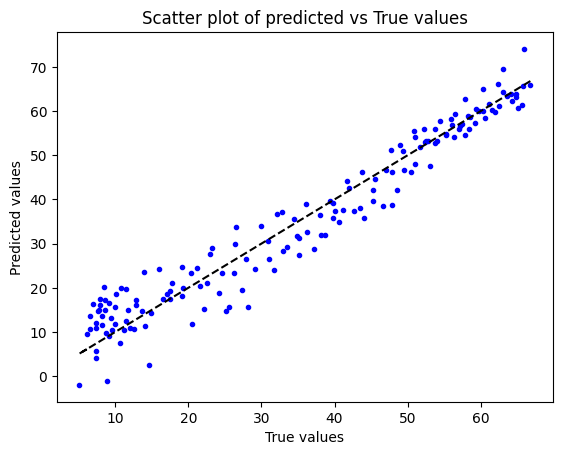

In [90]:
# @title Polynomial Training plot
import matplotlib.pyplot as plt
#[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
random_state =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
scalertr = StandardScaler().fit(x_train)
x_train = scalertr.transform(x_train)
x_test = scalertr.transform(x_test)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_model = make_pipeline(poly_features , PCA(n_components=50),LinearRegression())
model_poly= poly_model.fit(x_train, y_train)

#TRAINING MODEL
y_pred = model_poly.predict(x_train)
dif_mc = abs(y_pred - y_train)
y_train = np.array(y_train)
m = dif_mc[np.where(y_train > 50)]
n = dif_mc[np.where((y_train > 15) & (y_train < 50))]
t = dif_mc[np.where(y_train < 15)]
mae1 = m.mean()
mae2 = n.mean()
mae3 = t.mean()
print(mae1)
print(mae2)
print(mae3)
# MODEL TESTING
y_pred_test = model_poly.predict(x_test)
dif_mc_tt = abs(y_pred_test - y_test)
y_test = np.array(y_test)
m = dif_mc_tt[np.where(y_test > 50)]
n = dif_mc_tt[np.where((y_test > 15) & (y_test < 50))]
t = dif_mc_tt[np.where(y_test < 15)]
mae1_tt = m.mean()
mae2_tt = n.mean()
mae3_tt = t.mean()
print(mae1_tt)
print(mae2_tt)
print(mae3_tt)

plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

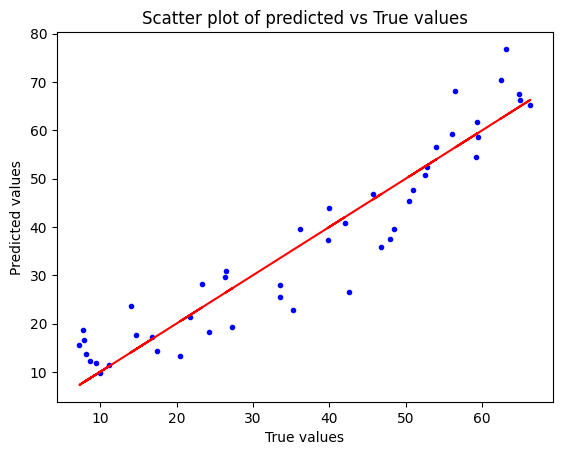

In [ ]:
# @title Polynomial Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [ ]:
# @title POLYNOMIAL + RIDGE Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_model = make_pipeline(poly_features , PCA(n_components=40), Ridge(alpha=0.001))
model= poly_model.fit(x_train, y_train)
#TRAINING MODEL
x_poly_train = poly_features.fit_transform(x_train)
y_pred = model.predict(x_train)

Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
x_poly_test = poly_features.fit_transform(x_test)
y_pred_test = model.predict(x_test)

Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9341800039822568
TRAINING MSE: 25.717211736732967
TRAINING MAE: 3.967085399491577
TEST Rsquared: 0.9101373117433502
TEST MSE: 34.26418251145454
TEST MAE: 4.612374725502288


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

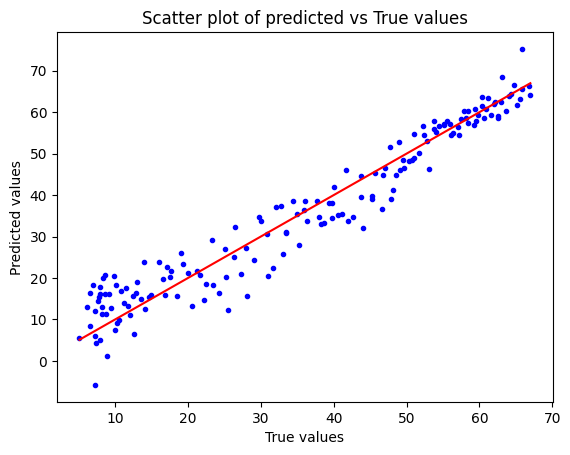

In [ ]:
# @title Polynomial + Ridge Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

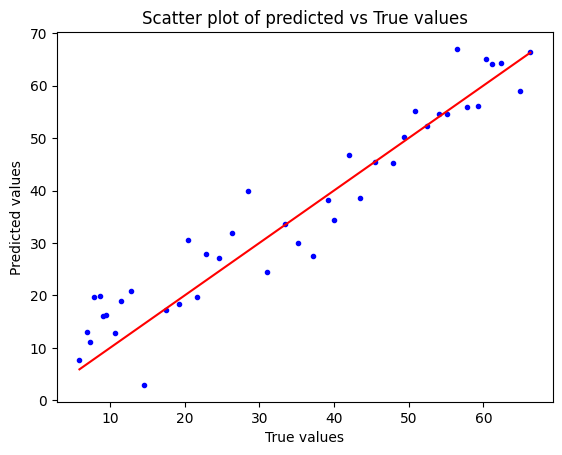

In [ ]:
# @title Polynomial + Ridge Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **4 PLS REGRESSION**

In [68]:
# @title PLSR Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
features = np.array(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
    #y_train = y_train.reshape(1, -1)
    #y_test = y_train.reshape(1, -1)
    scalertr = StandardScaler().fit(x_train)
    x_train = scalertr.transform(x_train)
    x_test = scalertr.transform(x_test)
    plsr = PLSRegression(n_components=9,tol=0.01,max_iter=1000)
    model_plsr= plsr.fit(x_train, y_train)

    #TRAINING MODEL
    y_pred_plsr = model_plsr.predict(x_train)
    Rsquared_tr=r2_score(y_train,y_pred_plsr )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred_plsr))
    mae_training = mean_absolute_error(y_train,y_pred_plsr)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)

    # MODEL TESTING
    y_pred_test_plsr = model_plsr.predict(x_test)
    Rsquared_tt=r2_score(y_test,y_pred_test_plsr)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test_plsr))
    mae_test = mean_absolute_error(y_test,y_pred_test_plsr)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)

print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

TRAINING Rsquared: Average: 0.8660076837815259      SD : 0.014716556447798922
TRAINING MSE:      Average: 7.2449404637136325      SD : 0.4175630048862209
TRAINING MAE:      Average: 5.472329615826107       SD : 0.26099676151036005
TEST Rsquared:     Average: 0.8317352358106899      SD : 0.0937117813545301
TEST MSE:          Average: 7.703854851066247        SD : 1.9030548188976608
TEST MAE:          Average: 5.786642691039797       SD : 0.7400467735493664


In [ ]:
# @title PLS Model
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

plsr = PLSRegression(n_components=9,tol=0.01,max_iter=1000)
model= plsr.fit(x_train, y_train)
    #TRAINING MODEL
y_pred = model.predict(x_train)

Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
y_pred_test = model.predict(x_test)

Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

#print("TRAINING Rsquared:",Rsquared_tr)
#print("TRAINING MSE:",mse_training)
#print("TRAINING MAE:",mae_training)
#print("TEST Rsquared:",Rsquared_tt)
#print("TEST MSE:",mse_test)
#print("TEST MAE:",mae_test)


25.6314734999047
18.871052775390336
23.013303296724715
27.212914170384032
18.883099577775052
24.70345128359506


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

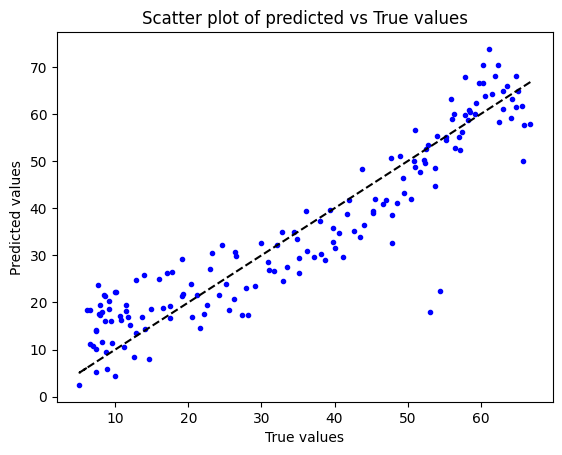

In [95]:
# @title PLS Training plot
import matplotlib.pyplot as plt
#[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
random_state =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
scalertr = StandardScaler().fit(x_train)
x_train = scalertr.transform(x_train)
x_test = scalertr.transform(x_test)
plsr = PLSRegression(n_components=9,tol=0.01,max_iter=1000)
model_plsr= plsr.fit(x_train, y_train)

#TRAINING MODEL
y_pred_plsr = model_plsr.predict(x_train)
dif_mc = abs(y_pred_plsr - y_train)
y_train = np.array(y_train)
m = dif_mc[np.where(y_train > 50)]
n = dif_mc[np.where((y_train > 15) & (y_train < 50))]
t = dif_mc[np.where(y_train < 15)]
mae1 = m.mean()
mae2 = n.mean()
mae3 = t.mean()
print(mae1)
print(mae2)
print(mae3)

# MODEL TESTING
y_pred_test = model_plsr.predict(x_test)
dif_mc_tt = abs(y_pred_test - y_test)
y_test = np.array(y_test)
m = dif_mc_tt[np.where(y_test > 50)]
n = dif_mc_tt[np.where((y_test > 15) & (y_test < 50))]
t = dif_mc_tt[np.where(y_test < 15)]
mae1_tt = m.mean()
mae2_tt = n.mean()
mae3_tt = t.mean()
print(mae1_tt)
print(mae2_tt)
print(mae3_tt)

plt.scatter(y_train,y_pred_plsr,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

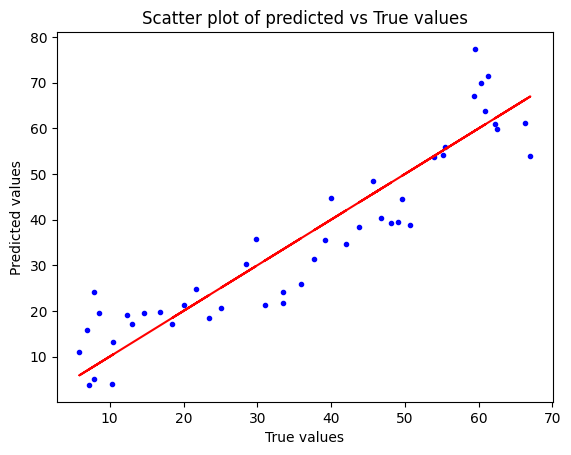

In [94]:
# @title PLS Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **5 Multiple Linear Regression**

In [ ]:
# @title MLR1 Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.decomposition import PCA

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg = linear_model.LinearRegression()
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
model= reg.fit(x_train, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

#print("TRAINING Rsquared:",Rsquared_tr)
#print("TRAINING MSE:",mse_training)
#print("TRAINING MAE:",mae_training)
#print("TEST Rsquared:",Rsquared_tt)
#print("TEST MSE:",mse_test)
#print("TEST MAE:",mae_test)


In [3]:
# @title MLR Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))

    #reg = make_pipeline(StandardScaler(),
         #           SGDRegressor(max_iter=1000, tol=1e-3))

    reg = SGDRegressor(max_iter=1000, tol=1e-3)
    pca = PCA(n_components=12)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.fit_transform(x_test)
    model= reg.fit(x_train_pca, y_train)

    #TRAINING MODEL
    y_pred = model.predict(x_train_pca)
    Rsquared_tr=r2_score(y_train,y_pred )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred))
    mae_training = mean_absolute_error(y_train,y_pred)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)

    # MODEL TESTING
    y_pred_test = model.predict(x_test_pca)
    Rsquared_tt=r2_score(y_test,y_pred_test)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test))
    mae_test = mean_absolute_error(y_test,y_pred_test)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)
print(reg)
print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

SGDRegressor()
TRAINING Rsquared: Average: 0.8235353309434306      SD : 0.022035743036724304
TRAINING MSE:      Average: 8.309577560859816      SD : 0.5550118465301018
TRAINING MAE:      Average: 6.324181611199281       SD : 0.37687429244206766
TEST Rsquared:     Average: -1.4671060387385284      SD : 1.3840385290111696
TEST MSE:          Average: 28.255893527441646        SD : 11.107742843111932
TEST MAE:          Average: 23.91532338416905       SD : 10.350483926216734


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

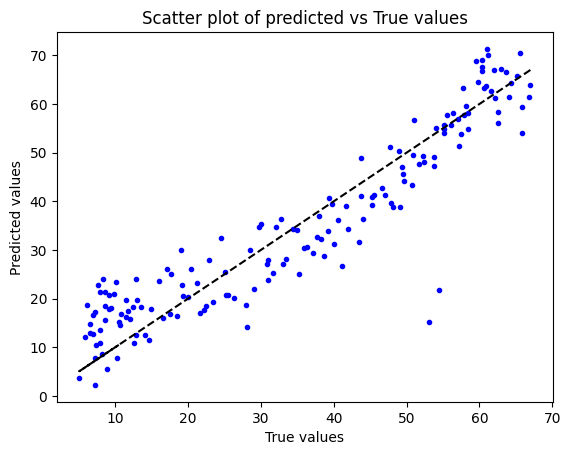

In [ ]:
# @title MLR Training plot
import matplotlib.pyplot as plt
#[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
random_states =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))

reg = linear_model.LinearRegression()
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
model= reg.fit(x_train_pca, y_train)
#TRAINING MODEL
y_pred = model.predict(x_train_pca)

# MODEL TESTING
y_pred_test = model.predict(x_test_pca)

plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

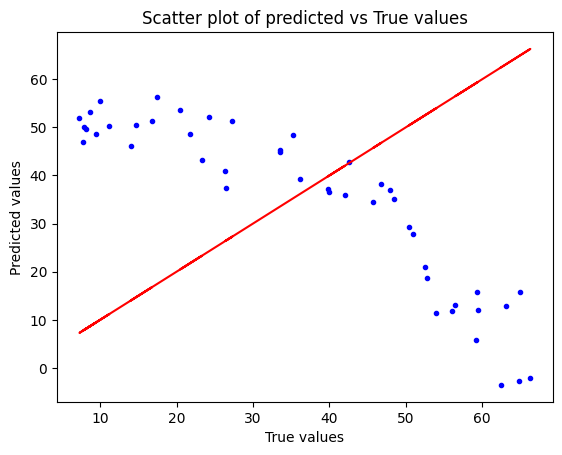

In [ ]:
# @title MLR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **6 Decision Trees Regression**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

# Tuning of parameters for regression by cross-validation
K = 20               # Number of cross valiations
# Parameters for tuning
parameters = [{'min_samples_split': [2,3,4,5,6,7],'min_samples_leaf': [1,2,3,4,5,6,7], 'max_depth': [1,2,3,4,5,6,7,8,9]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=100), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}
-264.552 (+/-876.786) for {'max_depth': 1, 'min

In [ ]:
# @title DTR Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg =  DecisionTreeRegressor(max_depth=7,min_samples_leaf=1, random_state= None,min_samples_split=15)
model= reg.fit(x_train, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

#print("TRAINING Rsquared:",Rsquared_tr)
#print("TRAINING MSE:",mse_training)
#print("TRAINING MAE:",mae_training)
#print("TEST Rsquared:",Rsquared_tt)
#print("TEST MSE:",mse_test)
#print("TEST MAE:",mae_test)


In [97]:
# @title MLR Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
features = np.array(features)
features1 = features[range(22)]
features2 = features[range(22,47)]
features3 = features[range(47,69)]
features4 = features[range(69,85)]
features5 = features[range(85,103)]
features6 = features[range(103,119)]
features7 = features[range(119,133)]
features8 = features[range(133,151)]
features9 = features[range(151,170)]
features10 = features[range(170,209)]
label1 = label[range(22)]
label2 = label[range(22,47)]
label3 = label[range(47,69)]
label4 = label[range(69,85)]
label5 = label[range(85,103)]
label6 = label[range(103,119)]
label7 = label[range(119,133)]
label8 = label[range(133,151)]
label9 = label[range(151,170)]
label10 = label[range(170,209)]
random_states =[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
rmse_test_list = []
rmse_training_list = []
mae_test_list = []
mae_training_list = []
Rsquared_test_list = []
Rsquared_training_list = []
x_test = []
y_train = []
y_test = []
indexes=list(range(len(label)))
for random_state in random_states:
    x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
    x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
    x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
    x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
    x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
    x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
    x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
    x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
    x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
    x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
    x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
    x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
    y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
    y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))
    scalertr = StandardScaler().fit(x_train)
    x_train = scalertr.transform(x_train)
    x_test = scalertr.transform(x_test)
    dec =  DecisionTreeRegressor(max_depth=9,min_samples_leaf=1, random_state= None,min_samples_split=6)
    model_dec= dec.fit(x_train, y_train)

    #TRAINING MODEL
    y_pred = model_dec.predict(x_train)
    Rsquared_tr=r2_score(y_train,y_pred )
    rmse_training=sqrt(mean_squared_error(y_train,y_pred))
    mae_training = mean_absolute_error(y_train,y_pred)
    Rsquared_training_list.append(Rsquared_tr)
    rmse_training_list.append(rmse_training)
    mae_training_list.append(mae_training)

    # MODEL TESTING
    y_pred_test = model_dec.predict(x_test)
    Rsquared_tt=r2_score(y_test,y_pred_test)
    rmse_test= sqrt(mean_squared_error(y_test,y_pred_test))
    mae_test = mean_absolute_error(y_test,y_pred_test)
    Rsquared_test_list.append(Rsquared_tt)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)

average_Rsquared_tr = np.mean(Rsquared_training_list)
standard_deviation_Rsquared_tr = np.std(Rsquared_training_list)

average_rmse_tr = np.mean(rmse_training_list)
standard_deviation_rmse_tr = np.std(rmse_training_list)

average_mae_tr = np.mean(mae_training_list)
standard_deviation_mae_tr = np.std(mae_training_list)

average_Rsquared_tt = np.mean(Rsquared_test_list)
standard_deviation_Rsquared_tt = np.std(Rsquared_test_list)

average_rmse_tt = np.mean(rmse_test_list)
standard_deviation_rmse_tt = np.std(rmse_test_list)

average_mae_tt = np.mean(mae_test_list)
standard_deviation_mae_tt = np.std(mae_test_list)

print("TRAINING Rsquared:","Average:",average_Rsquared_tr,"","    SD :",standard_deviation_Rsquared_tr)
print("TRAINING MSE:","     Average:",average_rmse_tr,"","    SD :",standard_deviation_rmse_tr)
print("TRAINING MAE:","     Average:", average_mae_tr,"","     SD :",standard_deviation_mae_tr)
print("TEST Rsquared:","    Average:", average_Rsquared_tt,"","    SD :",standard_deviation_Rsquared_tt)
print("TEST MSE:","         Average:", average_rmse_tt,"","      SD :",standard_deviation_rmse_tt)
print("TEST MAE:","         Average:", average_mae_tt,"","     SD :",standard_deviation_mae_tt)

TRAINING Rsquared: Average: 0.9907100324547402      SD : 0.0020134029323488818
TRAINING MSE:      Average: 1.9005274328711472      SD : 0.19979836451860947
TRAINING MAE:      Average: 1.2532737984578477       SD : 0.09464089318708918
TEST Rsquared:     Average: 0.8287509141501275      SD : 0.08882481694642055
TEST MSE:          Average: 7.74434305163998        SD : 2.011419754749638
TEST MAE:          Average: 5.244064735083756       SD : 0.9113905333718294


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

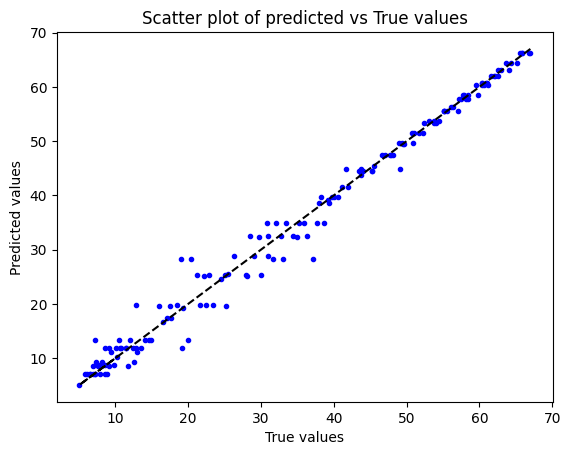

In [ ]:
# @title DTR Training plot
import matplotlib.pyplot as plt
#[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600]
random_states =150

x1_train,x1_test,y1_train,y1_test = train_test_split(features1,label1,test_size=0.2,random_state=random_state)
x2_train,x2_test,y2_train,y2_test = train_test_split(features2,label2,test_size=0.2,random_state=random_state)
x3_train,x3_test,y3_train,y3_test = train_test_split(features3,label3,test_size=0.2,random_state=random_state)
x4_train,x4_test,y4_train,y4_test = train_test_split(features4,label4,test_size=0.2,random_state=random_state)
x5_train,x5_test,y5_train,y5_test = train_test_split(features5,label5,test_size=0.2,random_state=random_state)
x6_train,x6_test,y6_train,y6_test = train_test_split(features6,label6,test_size=0.2,random_state=random_state)
x7_train,x7_test,y7_train,y7_test = train_test_split(features7,label7,test_size=0.2,random_state=random_state)
x8_train,x8_test,y8_train,y8_test = train_test_split(features8,label8,test_size=0.2,random_state=random_state)
x9_train,x9_test,y9_train,y9_test = train_test_split(features9,label9,test_size=0.2,random_state=random_state)
x10_train,x10_test,y10_train,y10_test = train_test_split(features10,label10,test_size=0.2,random_state=random_state)
x_train=np.vstack((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train,x10_train))
x_test =np.vstack((x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test,x10_test))
y_train = np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train))
y_test = np.concatenate((y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test))

dec =  DecisionTreeRegressor(max_depth=9,min_samples_leaf=1, random_state= None,min_samples_split=6)
model_dec= dec.fit(x_train, y_train)
#TRAINING MODEL
y_pred_dec = model_dec.predict(x_train)
dif_mc = abs(y_pred_dec - y_train)
y_train = np.array(y_train)
m = dif_mc[np.where(y_train > 50)]
n = dif_mc[np.where((y_train > 15) & (y_train < 50))]
t = dif_mc[np.where(y_train < 15)]
mae1 = m.mean()
mae2 = n.mean()
mae3 = t.mean()
print(mae1)
print(mae2)
print(mae3)
# MODEL TESTING
y_pred_test_dec = model_dec.predict(x_test)
dif_mc_tt = abs(y_pred_test_dec - y_test)
y_test = np.array(y_test)
m = dif_mc_tt[np.where(y_test > 50)]
n = dif_mc_tt[np.where((y_test > 15) & (y_test < 50))]
t = dif_mc_tt[np.where(y_test < 15)]
mae1_tt = m.mean()
mae2_tt = n.mean()
mae3_tt = t.mean()
print(mae1_tt)
print(mae2_tt)
print(mae3_tt)
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='black',linestyle = '--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

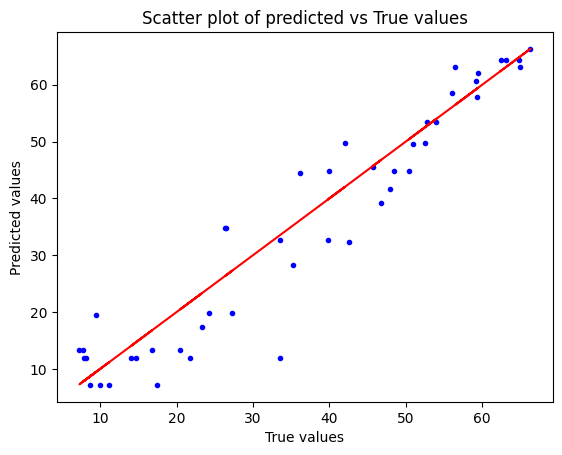

In [ ]:
# @title DTR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [ ]:
# @title DTR with AdaBoost Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg =  AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state= None,
loss ='linear',learning_rate = 1)
#DecisionTreeRegressor(max_depth=7,min_samples_leaf=1, random_state=100,min_samples_split=15)
model= reg.fit(x_train, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9784276732627478
TRAINING MSE: 8.42874700579359
TRAINING MAE: 2.502966605856036
TEST Rsquared: 0.9064734262471097
TEST MSE: 35.661203274796385
TEST MAE: 4.644406410268361


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

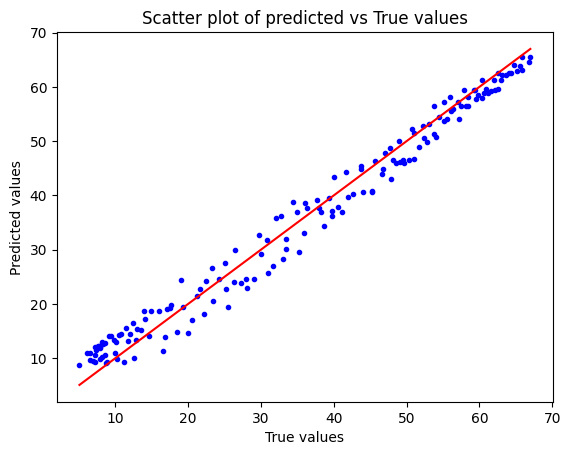

In [ ]:
# @title DTR with AdaBoost Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

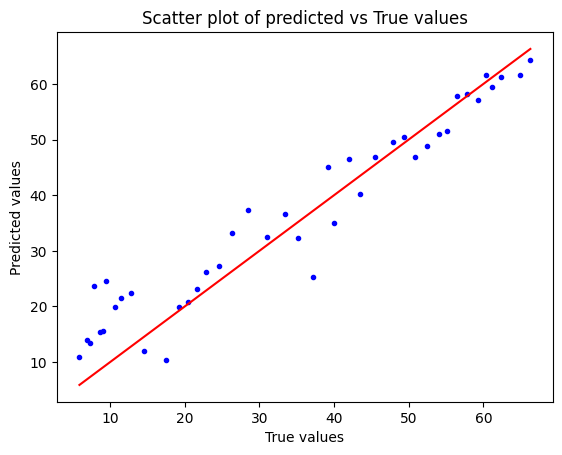

In [ ]:
# @title DTR with AdaBoost Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()